How can we predict a categorical label
1. Logistic Regression 
    1. Logistic regression is a classification algorithm design to predict categorical target labels.
where categorical target columns is two or more discreate class labels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

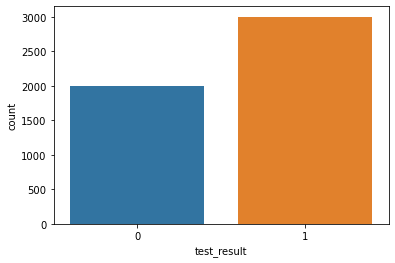

In [6]:
sns.countplot(data = df, x = 'test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

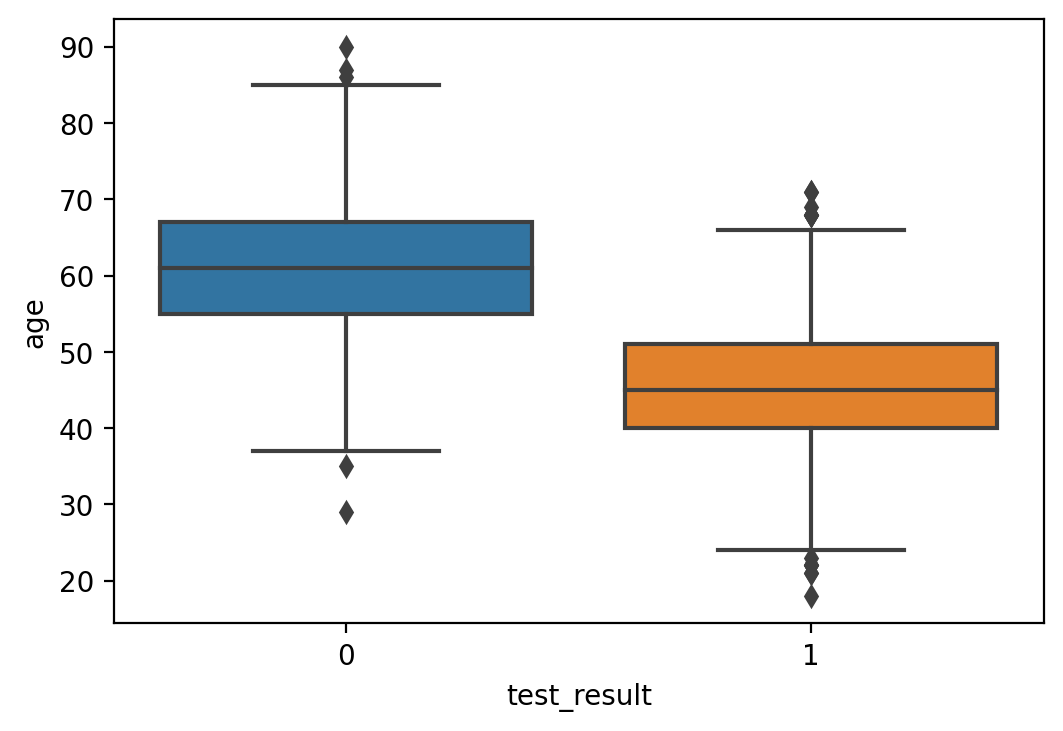

In [7]:
# Result as the age
plt.figure( dpi = 200)
sns.boxplot(x = 'test_result', y = 'age', data = df)


<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

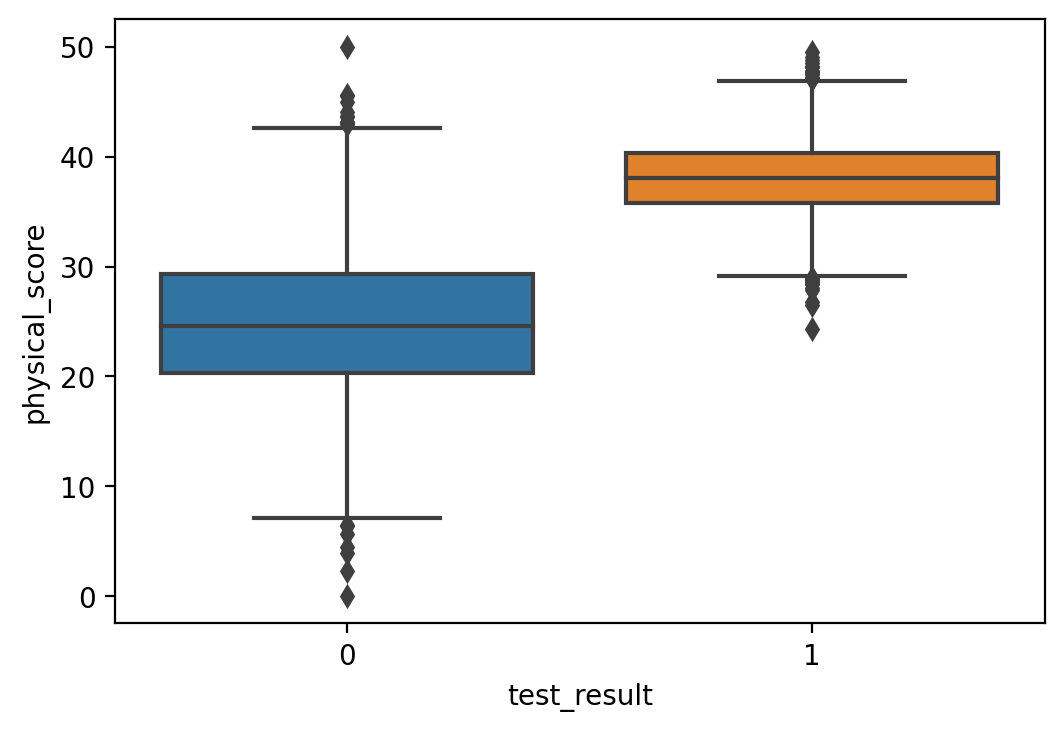

In [8]:
# plot as the physical score
plt.figure( dpi = 200)
sns.boxplot(x = 'test_result', y = 'physical_score', data = df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

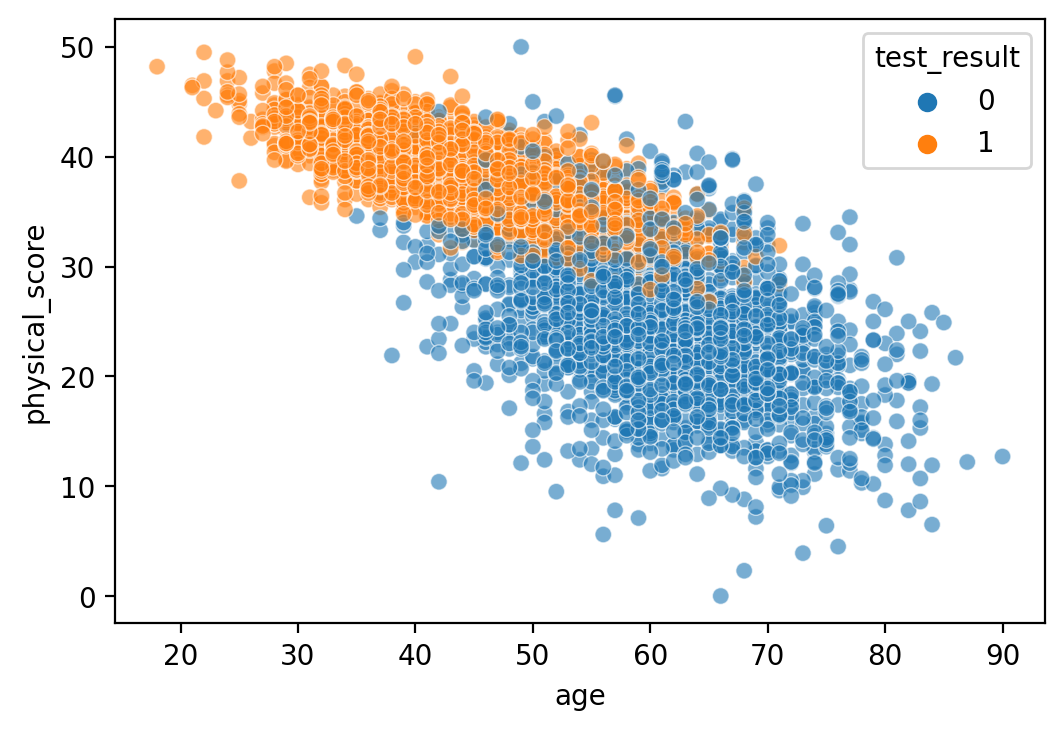

In [9]:
plt.figure(dpi = 200)
sns.scatterplot(x = 'age', y = 'physical_score', data=df,
               hue = 'test_result', alpha = 0.6)

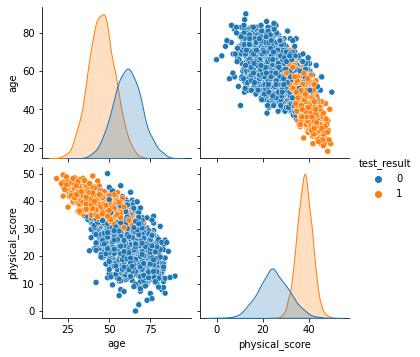

In [10]:
sns.pairplot(df, hue = 'test_result')

<AxesSubplot:>

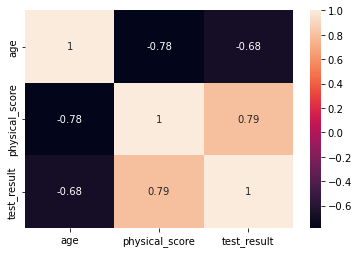

In [11]:
sns.heatmap(df.corr(), annot =True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

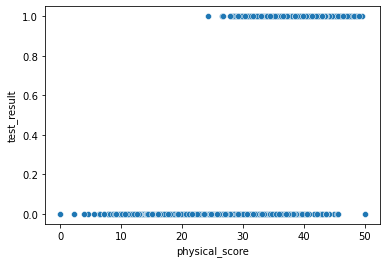

In [12]:
sns.scatterplot(data=df, x = 'physical_score',y = 'test_result' )

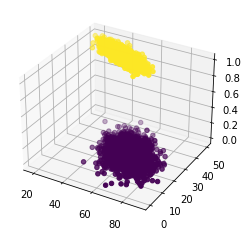

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'],df['physical_score'], df['test_result'], c =df['test_result'] )

# Creating and training a logistic model

In [14]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [15]:
X  = df.drop('test_result', axis = 1)

In [16]:
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [22]:
scaled_X_test  = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [26]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [28]:
y_pred = log_model.predict(scaled_X_test)

In [29]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,